In [156]:
%load_ext autoreload
%autoreload 2
#!/usr/bin/env python
import interpolation
import scipy as sc
import scipy.stats
from scipy.special import erf
import random as rd


try:
    import gi

    gi.require_version("NumCosmo", "1.0")
    gi.require_version("NumCosmoMath", "1.0")
except:
    pass

import math
from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm
import sys

sys.path.insert(0, "../../scripts")
import os
import numpy as np
from astropy.table import Table
from numpy import random
import scipy
import matplotlib.pyplot as plt
import clmm
from clmm import GalaxyCluster, ClusterEnsemble, GCData
from clmm import Cosmology
from clmm.support import mock_data as mock
import pandas as pd
import numpy as np
import pyccl as ccl
import sacc

clmm.__version__
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import scipy.integrate
import astropy.units as u
import firecrown
from firecrown.models import richness_proxy
from scipy.interpolate import interp1d

ncdata_fits = fits.open(
    "/pbs/home/e/ebarroso/firecrown/examples/number_counts/Generate and Analyze data/ncount_nodist_32.fits"
)
ncdata_data = ncdata_fits[1].data

ncdata_Table = Table(ncdata_data)
ncdata_Table

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Z_OBS,LNM_OBS,Z_TRUE,LNM_TRUE
float64,float64,float64,float64
0.4285610549833374,30.255507852075702,0.4285610549833374,30.255507852075702
0.547082547647362,31.555589810758786,0.547082547647362,31.555589810758786
0.46818292662884137,31.393096588512037,0.46818292662884137,31.393096588512037
0.5089924211346762,30.9163464148807,0.5089924211346762,30.9163464148807
0.5604603014832846,31.049929670576997,0.5604603014832846,31.049929670576997
0.5222896848618753,30.066226408672655,0.5222896848618753,30.066226408672655
0.25500137707675935,30.585015664118146,0.25500137707675935,30.585015664118146
0.5126420412266512,30.310959393533135,0.5126420412266512,30.310959393533135
0.5803645711453446,33.169450212989204,0.5803645711453446,33.169450212989204


In [157]:
lnM = np.array(ncdata_Table["LNM_TRUE"])
z = np.array(ncdata_Table["Z_TRUE"])
print(len(lnM))
print(lnz)
lnN = np.linspace(0, 6, 500)

89401
[0.42856105 0.54708255 0.46818293 ... 0.32304984 0.55976489 0.43975281]


In [162]:
proxy = richness_proxy.RMProxy()
proxy.likelihood_parameters = [
    3.19,
    0.8685889638,
    -0.30400613733,
    0.33,
    -0.03474355855,
    0.0,
]
rich = []
mass = []
z_list = []
lnN = np.array(lnN)
lnNi = 0.0
for a in range(0, len(z)):
    p_gauss = []
    lnMi = lnM[a]
    zi = z[a]
    generator = None
    proxy.likelihood_parameters = [
        3.19,
        0.8685889638,
        -0.30400613733,
        0.33,
        -0.03474355855,
        0.0,
    ]
    x, sigma = proxy.compute_theory_vector(
        np.log10(np.exp(lnNi)),  # pylint: disable=invalid-name
        np.log10(np.exp(lnMi)),
        zi,
    )  # pylint: disable=invalid-name
    mean = lnNi - x
    lnN_new = random.normal(mean, sigma)
    if lnN_new < 0:
        lnN_new = 0
    rich.append(lnN_new)
#    z_list.append(np.exp(lnzi))
#    mass.append(np.exp(lnMi))

89401


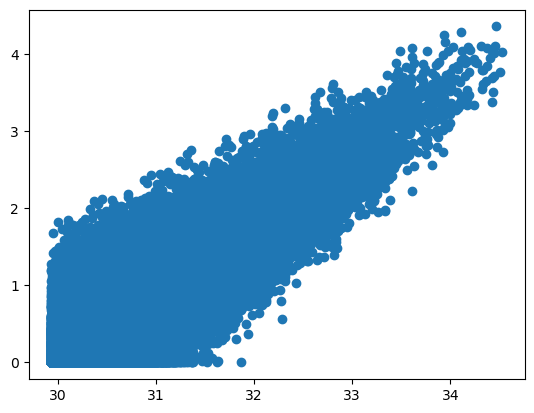

In [163]:
plt.scatter(lnM, rich)
print(len(rich))

In [164]:
file = open("richness.txt", "w")
for item in rich:
    file.write(f"{item}\n")
file.close()
# file = open('mass.txt','w')
# for item in mass:
#     file.write(f"{item}\n")
# file.close()
# file = open('redshift.txt','w')
# for item in z_list:
#     file.write(f"{item}\n")
# file.close()